# Центральная предельная теорема для случая распределения Лапласа 

Распределение Лапласа задается плотностью вероятности вида $f(x) = \frac{\alpha}{2}e^{-\alpha|x-\beta|}$. Матожидание $E\xi = \beta$, дисперсия $D\xi = \frac{2}{\alpha^2}$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math as mt 
from scipy.stats import laplace
%matplotlib inline

Задаем параметры распределения $\alpha, \beta$, создаем конкретное распределение из класса распределений Лапласа и массив из значений плотности вероятности этого распределения в точках на отрезке $[\beta - 5\alpha, \beta + 5\alpha]$: 

In [2]:
a = 1
b = 5.0
lapl_rv = laplace(loc = b, scale = a)
sample = lapl_rv.rvs(size=1000)
x = np.linspace(b-a*5,b+5*a,100)
pdf = lapl_rv.pdf(x)

Матожидание и дисперсия начального распределения Лапласа: 

In [3]:
Em = b
Dm = 2.0/(a**2)

Строим отнормированную гистограмму случайных величин, распределенных по Лапласу, и плотность вероятности: 

Text(0.5, 0, '$x$')

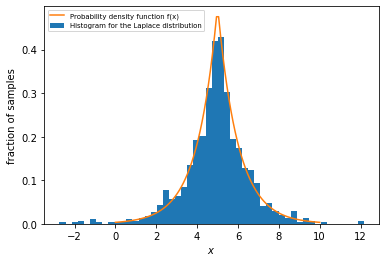

In [4]:
plt.hist(sample, density=True, bins = 50, label='Histogram for the Laplace distribution')
plt.plot(x, pdf, label='Probability density function f(x)')
plt.legend(loc='upper left', fontsize='x-small')
plt.ylabel('fraction of samples')
plt.xlabel('$x$')


## Проверка центральной предельной теоремы 

При различных объемах выборки (n) строится массив из выборочных средних и для этого массива нормированная гистограмма совместно с нормальным распределением $N(\beta, \sqrt{\frac{2}{\alpha^2n}}) $

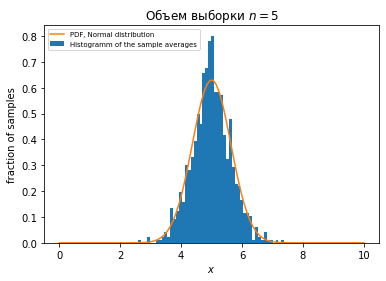

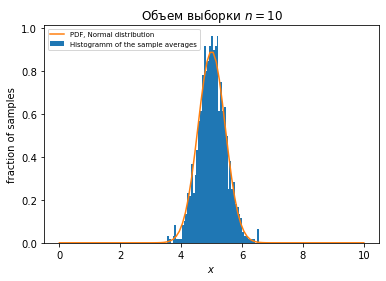

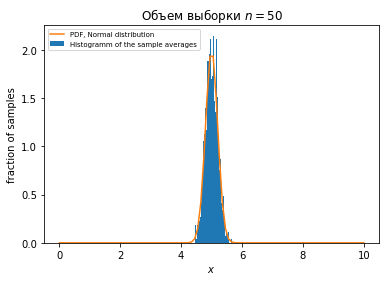

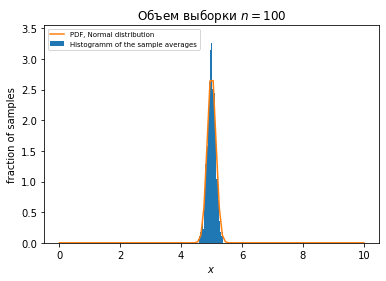

In [6]:
n = [5,10,50,100]
for i in n: 
    y2 = np.array([lapl_rv.rvs(size=i).mean() for z in range(0,1000)])
    Dmnew = Dm/i
#     print(y2)
    norm_rv = norm_rv = sts.norm(Em, mt.sqrt(Dmnew))
    pdfnew = norm_rv.pdf(x)
    plt.hist(y2, density=True, bins = 50, label='Histogramm of the sample averages')
    plt.plot(x, pdfnew, label='PDF, Normal distribution')
    plt.ylabel('fraction of samples')
    plt.xlabel('$x$')
    plt.legend(loc='upper left', fontsize='x-small')
    plt.title('Объем выборки $n=%s$' % (i))
    plt.show()

Видно, что даже при относительно небольшом объеме выборки n = 5 ЦПТ уже хорошо апроксимирует плотность распределения выборочных средних. Наибольшая точность достигается при наибольшем n. 